## ■ 라인 그래프 그리기
### 시간 순서에 따른 데이터의 변화를 볼 때 유용한 그래프

### ※ 문제126. 아래의 점(plot) 그래프를 그리시오

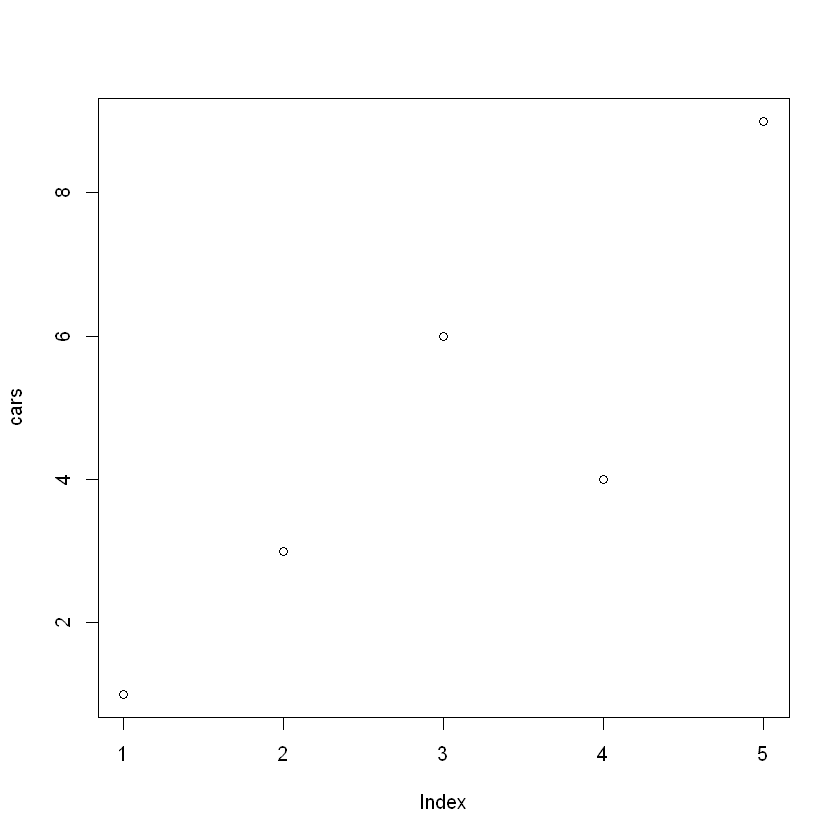

In [1]:
cars=c(1,3,6,4,9)
plot(cars)

### ※ 문제127. 위의 그래프에 파란색 선을 그리시오

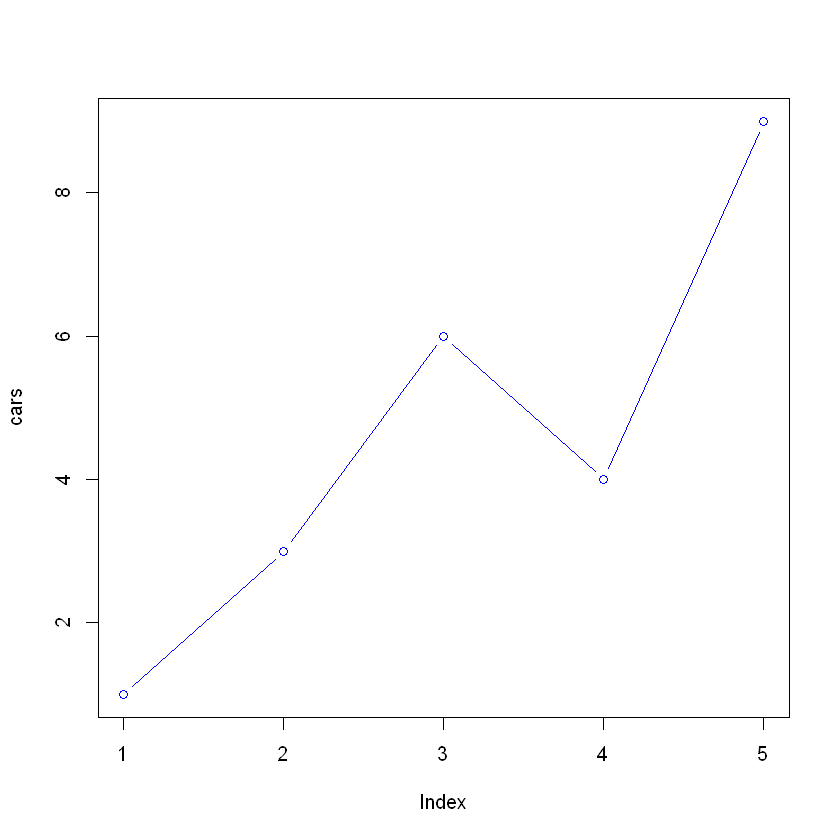

In [21]:
plot(cars, type='b', col='blue')

#### ※ type
    'o' : 선그리기

### ※ 문제128. 차와 트럭의 판매된 대수를 라인 그래프로 시각화 하시오

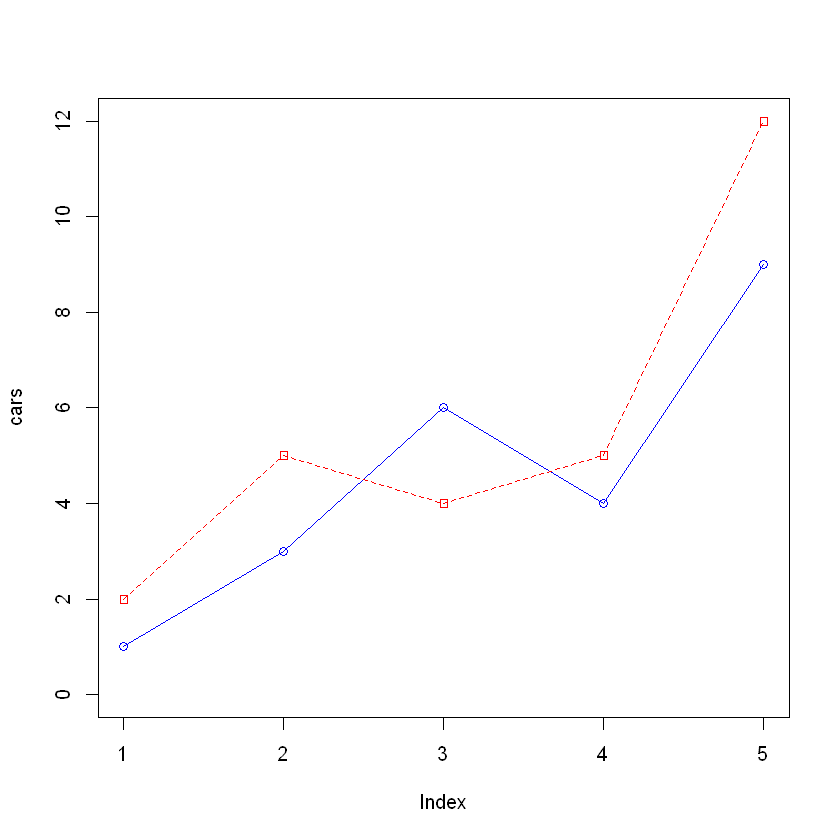

In [10]:
cars=c(1,3,6,4,9)
trucks=c(2,5,4,5,12)
plot(cars,type='o',col='blue',ylim=c(0,12),pch=21, lty=1) # pch=21 : 동그라미 ,lty=1 : 직선
lines(trucks, type='o',col='red',ylim=c(0,12),pch=22, lty=2) # pch=22 : 네모, lty=2 : 점선

### ※ 문제129. 가로축을 월~금으로 변경하시오

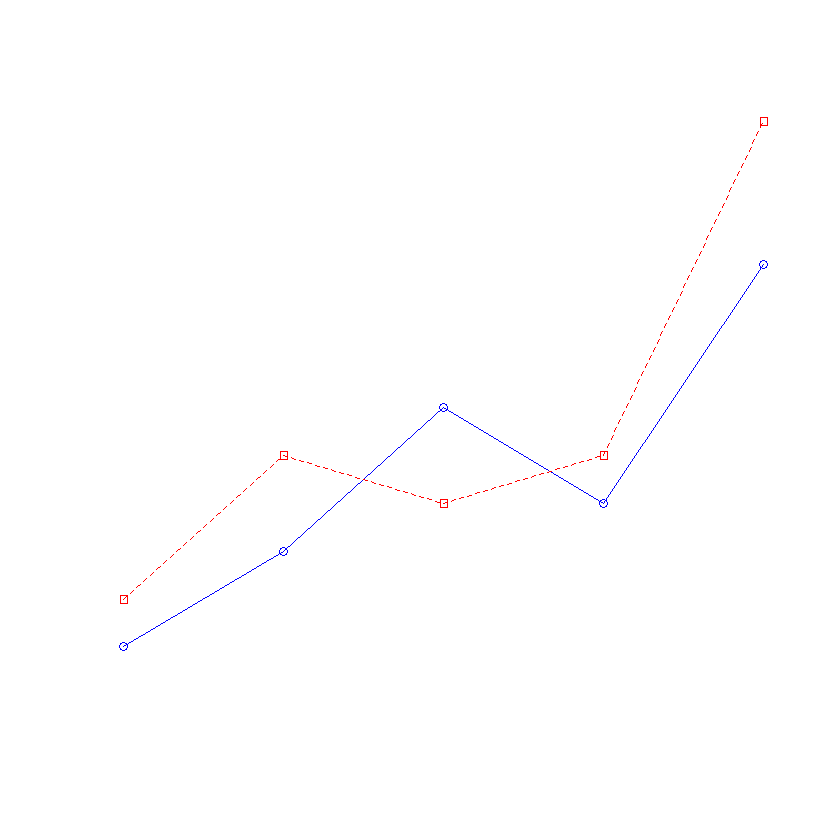

In [9]:
cars=c(1,3,6,4,9)
trucks=c(2,5,4,5,12)
plot(cars,type='o',col='blue',ylim=c(0,12),pch=21, lty=1,axes=F,ann=F) # axes : 축 표시, ann : 축 이름
lines(trucks, type='o',col='red',ylim=c(0,12),pch=22,lty=2)

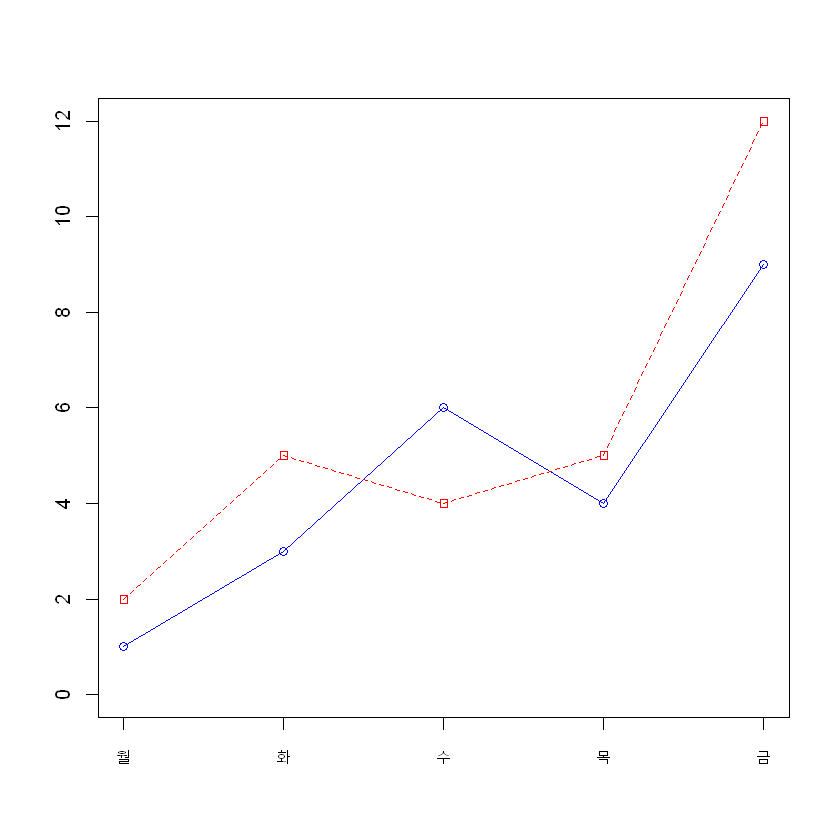

In [22]:
cars=c(1,3,6,4,9)
trucks=c(2,5,4,5,12)
plot(cars,type='o',col='blue',ylim=c(0,12),pch=21, lty=1,axes=F,ann=F) 
lines(trucks, type='o',col='red',ylim=c(0,12),pch=22,lty=2)
# 새로운 축 추가
axis(1, at=1:5, lab=c('월','화','수','목','금')) # axis(1:x축, at= : 범위, lab= : 축 라벨)
axis(2) # axis(2) : y축
box()
legend(8,range)

In [24]:
create_cnt=read.csv('창업건수.csv',head=T)
drop_cnt=read.csv('폐업건수.csv',head=T)

In [25]:
g_range=range(0,create_cnt$치킨집, drop_cnt$치킨집)
g_range

[1]    0 3579

### ※ 문제130. 위의 코드를 활용해서 치킨집의 창업/폐업 현황을 라인 그래프로 시각화 하시오 !

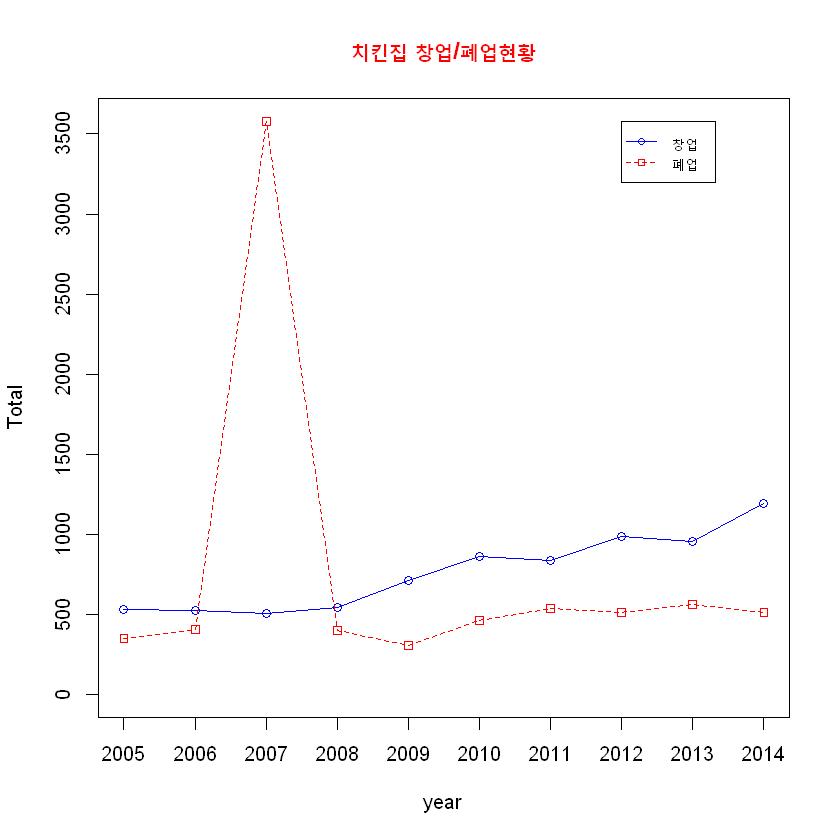

In [27]:
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T) 
g <- create_cnt$치킨집
m <- drop_cnt$치킨집
g_range <- range(0, g, m)
plot(g, type="o", col="blue", ylim=g_range, 
     axes=FALSE, ann=FALSE)
axis(1, at=1:10, lab=create_cnt$년도)
axis(2)
box()
lines(m, type="o", pch=22, lty=2, col="red")
title(main="치킨집 창업/폐업현황", col.main="red")
title(xlab="year" )
title(ylab="Total" )
legend( 8, g_range[2], c("창업","폐업"), cex=0.8, 
       col=c("blue","red"), pch=21:22, lty=1:2)

### ※ 문제131. 위의 코드를 이용해서 업종별 창업/폐업 현황을 사이니를 이용해서 라인 그래프로 자동화 하시오

In [ ]:
library(shiny)
library(datasets)
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T) 

# Define UI ----
ui <- fluidPage(    
  # Give the page a title
  titlePanel("연도별 업종별 창/폐업현황"),
  # Generate a row with a sidebar
  sidebarLayout(      
    # Define the sidebar with one input
    sidebarPanel(
      selectInput("region", "업종:", 
                  choices=colnames(create_cnt)[-1]),
      hr(),
      helpText("업종별 창업과 폐업 현황 보고서")
    ),
    # Create a spot for the barplot
    mainPanel(
      plotOutput("typePlot")  
    )
  )
)

# Define server logic ----
server <-function(input, output) {
  # Fill in the spot we created for a plot
  output$typePlot <- renderPlot({
    g <- create_cnt[,input$region]
    m <- drop_cnt[,input$region]
    g_range <- range(0, g, m)
    plot(g, type="o", col="blue", ylim=g_range, 
         axes=FALSE, ann=FALSE)
    axis(1, at=1:10, lab=create_cnt$년도)
    axis(2)
    box()
    lines(m, type="o", pch=22, lty=2, col="red")
    title(main="업종별 창업/폐업현황", col.main="red")
    title(xlab="year" )
    title(ylab="Total" )
    legend( 8, g_range[2], c("창업","폐업"), cex=0.8, col=c("blue","red"), pch=21:22, lty=1:2)
  })
}

# Run the app ----
shinyApp(ui = ui, server = server)